# Load Data
此資料是根據使用者的閱讀的內容，進行貼上標籤且進行評分
這個演示範例嘗試使用 Clustering 演算法，將類似興趣分佈的使用者給予 Grouping 

In [1]:
import json

In [2]:
users_data = []
for row in open("../data/results-20180206-135435.json"):
    
    lobj = json.loads(row)
    users_data.append(lobj)

In [3]:
cate_set = set()
for user in users_data:
    for rc in user['f0_']:
#         print(rc['category'])
        cate_set.add(rc['category'])


In [4]:
print("共有",len(cate_set),"類")

共有 128 類


# Generate Code Book

In [5]:
cate_set = list(cate_set)

In [6]:
cate2index = {}

for idx,cname in enumerate(cate_set) :
    cate2index[cname] = idx

# Data Transformation

In [7]:
users_data[0]

{'f0_': [{'category': '3C-汽車', 'score': '1'},
  {'category': '美食-亞洲料理', 'score': '1'},
  {'category': '3C-家電', 'score': '1'},
  {'category': '旅遊-國內-台北', 'score': '1'},
  {'category': '家庭-財金-高消費力族群', 'score': '1'},
  {'category': '旅遊-國內-基隆', 'score': '3'},
  {'category': '家庭-男性讀者-3C', 'score': '42'},
  {'category': '旅遊-國外-東京', 'score': '10'},
  {'category': '美妝-保養-身體保養', 'score': '2'},
  {'category': '旅遊-國外-日本', 'score': '18'},
  {'category': '3C-攝影', 'score': '50'},
  {'category': '3C-機車', 'score': '2'},
  {'category': '運動-運動賽事', 'score': '1'},
  {'category': '美妝-彩妝-眼妝', 'score': '1'},
  {'category': '美食-西餐', 'score': '1'},
  {'category': '3C-廠牌', 'score': '66'},
  {'category': '運動-綜合', 'score': '27'},
  {'category': '旅遊-國外-澳洲', 'score': '1'},
  {'category': '家庭-財金-飯店', 'score': '1'}],
 'hash_id': '7762006413276033000'}

In [8]:
userdata_transformed = []

for user in users_data:
    values = [0]*128
    hash_id = user['hash_id']
    for row in user['f0_']:
        cate = row['category']
        value = row['score']
        values[cate2index[cate]]=value
    
    userdata_transformed.append([hash_id]+values)

In [9]:
import pandas as pd 
df = pd.DataFrame(userdata_transformed,columns=['hash_id'] +cate_set ,dtype=np.int32)

In [10]:
df.set_index(['hash_id'])

,家庭-財金-飯店,美食-日式料理,美妝-臉部保養-美白,運動-賽車,家庭-財金-精品,家庭-寵物生活,美食-台式料理,美妝-彩妝-蘭蔻品牌愛好者,家庭-財金-專櫃品牌,旅遊-國內-桃園,...,運動-路跑,家庭-懷孕前,旅遊-國內-屏東,運動-籃球,美食-美式料理,旅遊-國外-澳洲,美食-鍋物,運動-健身,運動-人物,旅遊-國內-馬祖
hash_id,,,,,,,,,,,,,,,,,,,,,
1067397096,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
-1918402696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146434960,0,6,0,0,0,0,45,0,0,0,...,0,0,0,0,14,0,4,0,0,0
-122637040,0,2,0,0,0,0,30,0,0,60,...,0,0,0,0,0,0,21,0,0,0
47181272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
-1011666464,0,1,0,0,0,0,63,0,0,0,...,0,0,0,0,0,0,47,0,0,0
855858744,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,1,0,0,0,0,0
-1282035176,0,0,0,0,0,0,52,0,0,2,...,0,0,1,0,3,0,2,0,0,0
1600531776,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,0,0


In [11]:
df.describe()

,hash_id,家庭-財金-飯店,美食-日式料理,美妝-臉部保養-美白,運動-賽車,家庭-財金-精品,家庭-寵物生活,美食-台式料理,美妝-彩妝-蘭蔻品牌愛好者,家庭-財金-專櫃品牌,...,運動-路跑,家庭-懷孕前,旅遊-國內-屏東,運動-籃球,美食-美式料理,旅遊-國外-澳洲,美食-鍋物,運動-健身,運動-人物,旅遊-國內-馬祖
count,4.009000e+03,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,...,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000,4009.000000
mean,1.245612e+07,0.516089,7.837615,0.638314,0.010975,0.721876,0.124969,5.620604,0.097780,1.463457,...,1.154652,0.452731,0.676727,0.168371,5.468446,1.292592,2.919930,0.679721,0.006735,0.642305
std,1.222355e+09,4.392291,19.147547,5.241511,0.277894,5.519221,2.250659,14.119641,2.125061,7.952499,...,7.277301,4.550539,5.638322,2.533771,13.702702,8.499292,12.346778,6.053338,0.260899,4.426633
min,-2.146465e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.015521e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.061542e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.046374e+09,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.146668e+09,86.000000,100.000000,100.000000,11.000000,100.000000,63.000000,100.000000,80.000000,99.000000,...,100.000000,100.000000,99.000000,93.000000,100.000000,100.000000,100.000000,100.000000,14.000000,70.000000


In [12]:
df.mean().sort_values(ascending=True)[:10]

運動-人物              0.006735
運動-賽車              0.010975
家庭-財金-名錶           0.029683
美妝-臉部保養-雅詩蘭黛愛好者    0.046645
旅遊-國外-名古屋          0.051634
3C-手機遊戲            0.064106
運動-網球              0.077326
運動-運動賽事            0.085807
美妝-彩妝-蘭蔻品牌愛好者      0.097780
3C-電子競技            0.116737
dtype: float64

In [13]:
df.std().sort_values(ascending=False)[:10]

hash_id       1.222355e+09
旅遊-國內-台北      1.991328e+01
美食-日式料理       1.914755e+01
旅遊-國內-台中      1.751997e+01
旅遊-國外-韓國      1.744399e+01
美食-小吃         1.623662e+01
旅遊-國內-新北市     1.540812e+01
旅遊-國外-日本      1.500600e+01
家庭-食譜         1.445534e+01
家庭-財金-歐洲旅遊    1.434359e+01
dtype: float64

# 進行 K Mean Clustering

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [15]:
X = df.values

In [16]:
small_dim_num = []
vac_list = []
for nc in range(3,60):
    y_pred = KMeans(n_clusters=nc, random_state=1).fit_predict(X)
    df['cluster_#'] = y_pred
    cluster_3 = df[df['cluster_#'] ==2]
    cluster_3 = cluster_3.astype(np.int32)
    
    vac = cluster_3.var().sum()
    
    vac_list.append(vac)
    
    tf_n = (df.var()-cluster_3.var()>0).value_counts()
    
    
    small_dim_num.append(tf_n.values[0])

In [ ]:
# 看一下 Clustering 的結果中的變異成度是否有下降

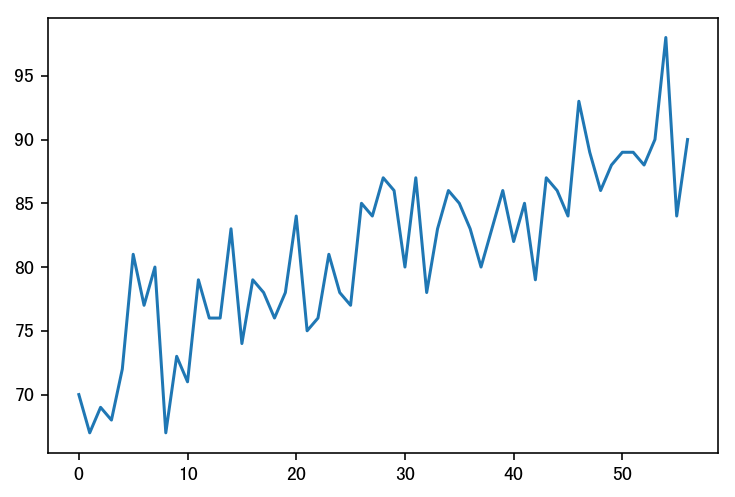

In [17]:
plt.plot(small_dim_num)


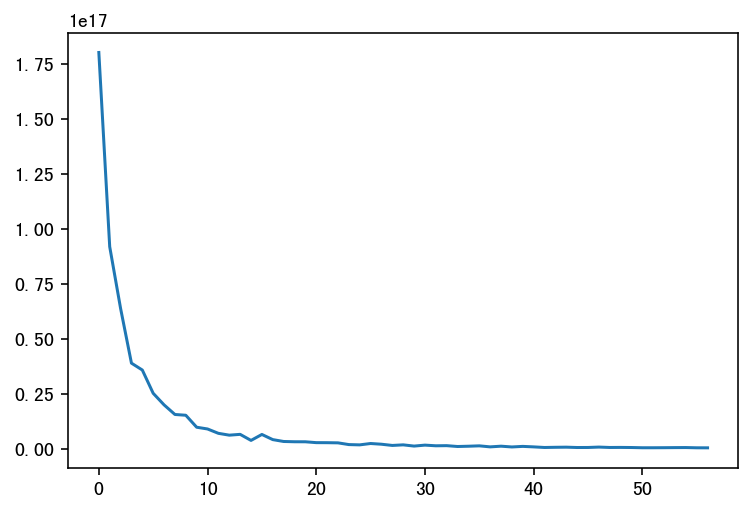

In [19]:
plt.plot(vac_list)

In [66]:
from sklearn import mixture


In [67]:
cv_types = ['spherical', 'tied', 'diag', 'full']

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=30, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [80]:
small_dim_num = []
vac_list = []
for nc in range(3,36):
    gmm = mixture.GaussianMixture(n_components=nc,
                              covariance_type='diag')
    gmm.fit(X)
    
    y_pred = gmm.predict(X)
    df['cluster_#'] = y_pred
    cluster_3 = df[df['cluster_#'] ==6]
    cluster_3 = cluster_3.astype(np.int32)
    
    vac = cluster_3.var().sum()
    
    vac_list.append(vac)
    
    tf_n = (df.var()-cluster_3.var()>0).value_counts()
    
    
    small_dim_num.append(tf_n.values[0])
    print(nc,end='')

34567891011121314151617181920212223242526272829303132333435

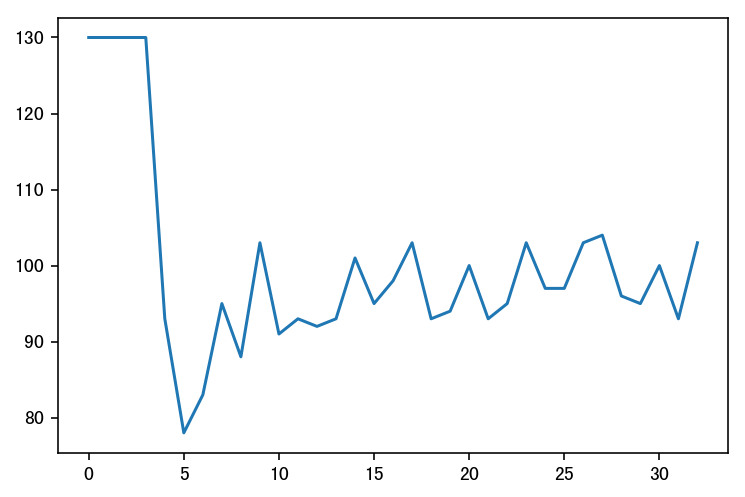

In [81]:
plt.plot(small_dim_num)


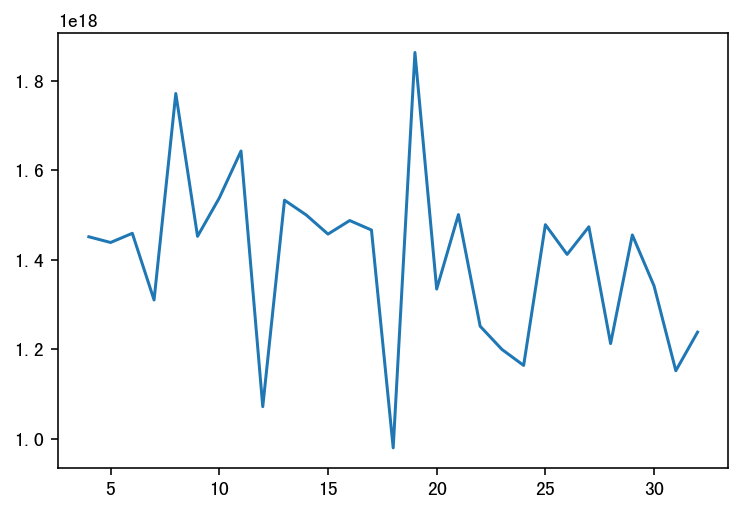

In [82]:
plt.plot(vac_list)